# Tech Challenge

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Obesity.csv', sep=',')

In [6]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [8]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [9]:
df.shape

(2111, 17)

In [10]:
df['Obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [11]:
df['Obesity'].value_counts()

# O dataset está equilibrado

,count
Obesity,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [12]:
# Embaralhar os dados

from sklearn.utils import shuffle

df = shuffle(df)

In [13]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
1707,Male,24.006271,1.607787,100.783434,yes,yes,2.880759,1.487674,Sometimes,no,1.013780,no,1.00109,1.098380,no,Public_Transportation,Obesity_Type_II
975,Female,18.052394,1.725233,75.970712,yes,yes,2.927409,3.000000,Sometimes,no,2.209991,no,1.00000,0.797215,Frequently,Public_Transportation,Overweight_Level_I
981,Male,32.774488,1.913241,101.482054,yes,yes,2.000000,2.110937,Sometimes,no,2.175632,no,1.00000,0.000000,Sometimes,Walking,Overweight_Level_II
1776,Male,38.108940,1.752863,119.201465,yes,yes,2.499388,2.989791,Sometimes,no,1.959777,no,0.60810,0.646760,Sometimes,Automobile,Obesity_Type_II
1347,Male,22.352025,1.754711,105.000706,yes,yes,2.871137,3.000000,Sometimes,no,2.627569,no,1.00000,0.000000,Sometimes,Public_Transportation,Obesity_Type_I


In [14]:
# Usando o IMC / BMI como feature, não como regra!
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [15]:
# Separando as features e target

X = df.drop('Obesity', axis=1)
y = df['Obesity']

In [16]:
numeric_features = [
    'Age', 'Height', 'Weight',
    'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI'
]

categorical_features = [
    'Gender', 'family_history', 'FAVC', 'CAEC',
    'SMOKE', 'SCC', 'CALC', 'MTRANS'
]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
# Pré-processamento

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

In [21]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [23]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [24]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9881796690307328

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        54
      Normal_Weight       0.94      1.00      0.97        58
     Obesity_Type_I       1.00      0.99      0.99        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       1.00      0.97      0.98        58
Overweight_Level_II       0.98      0.98      0.98        58

           accuracy                           0.99       423
          macro avg       0.99      0.99      0.99       423
       weighted avg       0.99      0.99      0.99       423


Confusion Matrix:
 [[54  0  0  0  0  0  0]
 [ 0 58  0  0  0  0  0]
 [ 0  0 69  0  0  0  1]
 [ 0  1  0 59  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  2  0  0  0 56  0]
 [ 0  1  0  0  0  0 57]]


In [25]:
import joblib
import os

# cria a pasta models
os.makedirs('models', exist_ok=True)

# salva o arquivo
joblib.dump(pipeline, "models/obesity_model.pkl")

['models/obesity_model.pkl']

In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    pipeline, X, y, cv=5, scoring='accuracy'
)

print("CV Accuracy média:", cv_scores.mean())
print("CV Std:", cv_scores.std())


CV Accuracy média: 0.9829439906781845
CV Std: 0.0070973143398739055


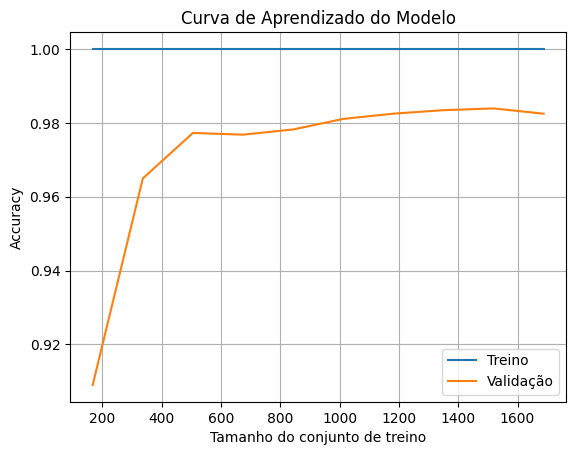

In [27]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    pipeline,
    X,
    y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Treino')
plt.plot(train_sizes, test_mean, label='Validação')
plt.xlabel('Tamanho do conjunto de treino')
plt.ylabel('Accuracy')
plt.title('Curva de Aprendizado do Modelo')
plt.legend()
plt.grid(True)
plt.show()



In [28]:
import sklearn
print(sklearn.__version__)

1.6.1
